In [13]:
import folium
import json

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
population04 = pd.read_csv('./data/population04.csv')
population07 = pd.read_csv('./data/population07.csv')
geo_data = './data/seoul_geo.json'
geo_data = json.load(open(geo_data, encoding='utf-8'))

In [3]:
population04.tail(5)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215995,20200430,22,40,여성,서울,성동구,22150
215996,20200430,22,50,여성,서울,서대문구,23270
215997,20200430,23,20,여성,서울,용산구,18570
215998,20200430,23,30,여성,서울,서대문구,21100
215999,20200430,23,40,남성,서울,강남구,45730


In [4]:
gu_population04 = population04.groupby('군구')['유동인구수'].sum().sort_values(ascending=False)
gu_population04

군구
강남구     415479300
송파구     372279240
강서구     316538320
서초구     293867470
노원구     286372000
관악구     285422490
영등포구    280428050
구로구     252685600
마포구     245660870
성북구     243666730
은평구     241684780
강동구     239157350
양천구     235960940
동작구     224537120
중랑구     210660150
동대문구    209673270
광진구     205584150
성동구     184605390
서대문구    182865220
도봉구     172730720
강북구     171437740
금천구     162236340
중구      152646440
종로구     152183320
용산구     151474540
Name: 유동인구수, dtype: int64

Text(0.5, 1.0, '구별 유동인구수')

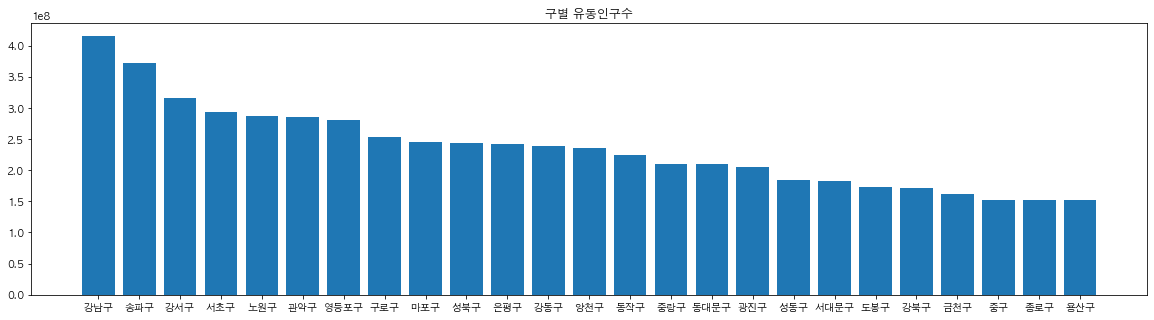

In [5]:
plt.figure(figsize=(20,5))
plt.bar(gu_population04.index, gu_population04)
plt.title('구별 유동인구수')

In [6]:
map04 = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles="stamentoner")

In [7]:
folium.Choropleth(
    geo_data=geo_data,
    data=gu_population04,
    columns=[gu_population04.index, gu_population04],
    fill_color='PuRd',
    key_on='feature.properties.name'
).add_to(map04)
map04

In [8]:
gangnam04 = population04[population04['군구'] == '강남구']
gangnam04

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
3,20200401,1,30,여성,서울,강남구,52380
12,20200401,4,50,남성,서울,강남구,40510
40,20200401,12,70,남성,서울,강남구,18640
43,20200401,14,50,여성,서울,강남구,59710
61,20200401,20,40,여성,서울,강남구,59900
148,20200403,2,60,여성,서울,강남구,28170
167,20200403,7,60,여성,서울,강남구,32960
209,20200403,21,20,남성,서울,강남구,49640
212,20200403,21,60,남성,서울,강남구,26640
219,20200404,3,30,여성,서울,강남구,50880


In [9]:
gangnam07 = population07[population07['군구'] == '강남구']
gangnam07

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
20,20200701,6,50,남성,서울,강남구,48340
40,20200701,15,60,남성,서울,강남구,34600
48,20200701,19,20,남성,서울,강남구,60810
58,20200701,22,40,남성,서울,강남구,59150
61,20200701,23,30,남성,서울,강남구,54910
74,20200702,5,20,남성,서울,강남구,37950
85,20200702,8,50,남성,서울,강남구,62260
92,20200702,11,60,남성,서울,강남구,34610
122,20200702,21,20,남성,서울,강남구,52240
135,20200703,2,50,여성,서울,강남구,42840


In [10]:
gangnam04_day = gangnam04.groupby('일자')['유동인구수'].sum().reset_index()
gangnam04_day['일'] = gangnam04_day.index + 1
gangnam04_day

,일자,유동인구수,일
0,20200401,14944020,1
1,20200402,14939240,2
2,20200403,14824170,3
3,20200404,11799100,4
4,20200405,10901220,5
5,20200406,14919780,6
6,20200407,15050390,7
7,20200408,14969060,8
8,20200409,14979370,9
9,20200410,14906870,10


In [11]:
gangnam07_day = gangnam07.groupby('일자')['유동인구수'].sum().reset_index()
gangnam07_day['일'] = gangnam07_day.index + 1
gangnam07_day

,일자,유동인구수,일
0,20200701,15655820,1
1,20200702,15689100,2
2,20200703,15554150,3
3,20200704,12533180,4
4,20200705,11426880,5
5,20200706,15487350,6
6,20200707,15672780,7
7,20200708,15679740,8
8,20200709,15749340,9
9,20200710,15616600,10


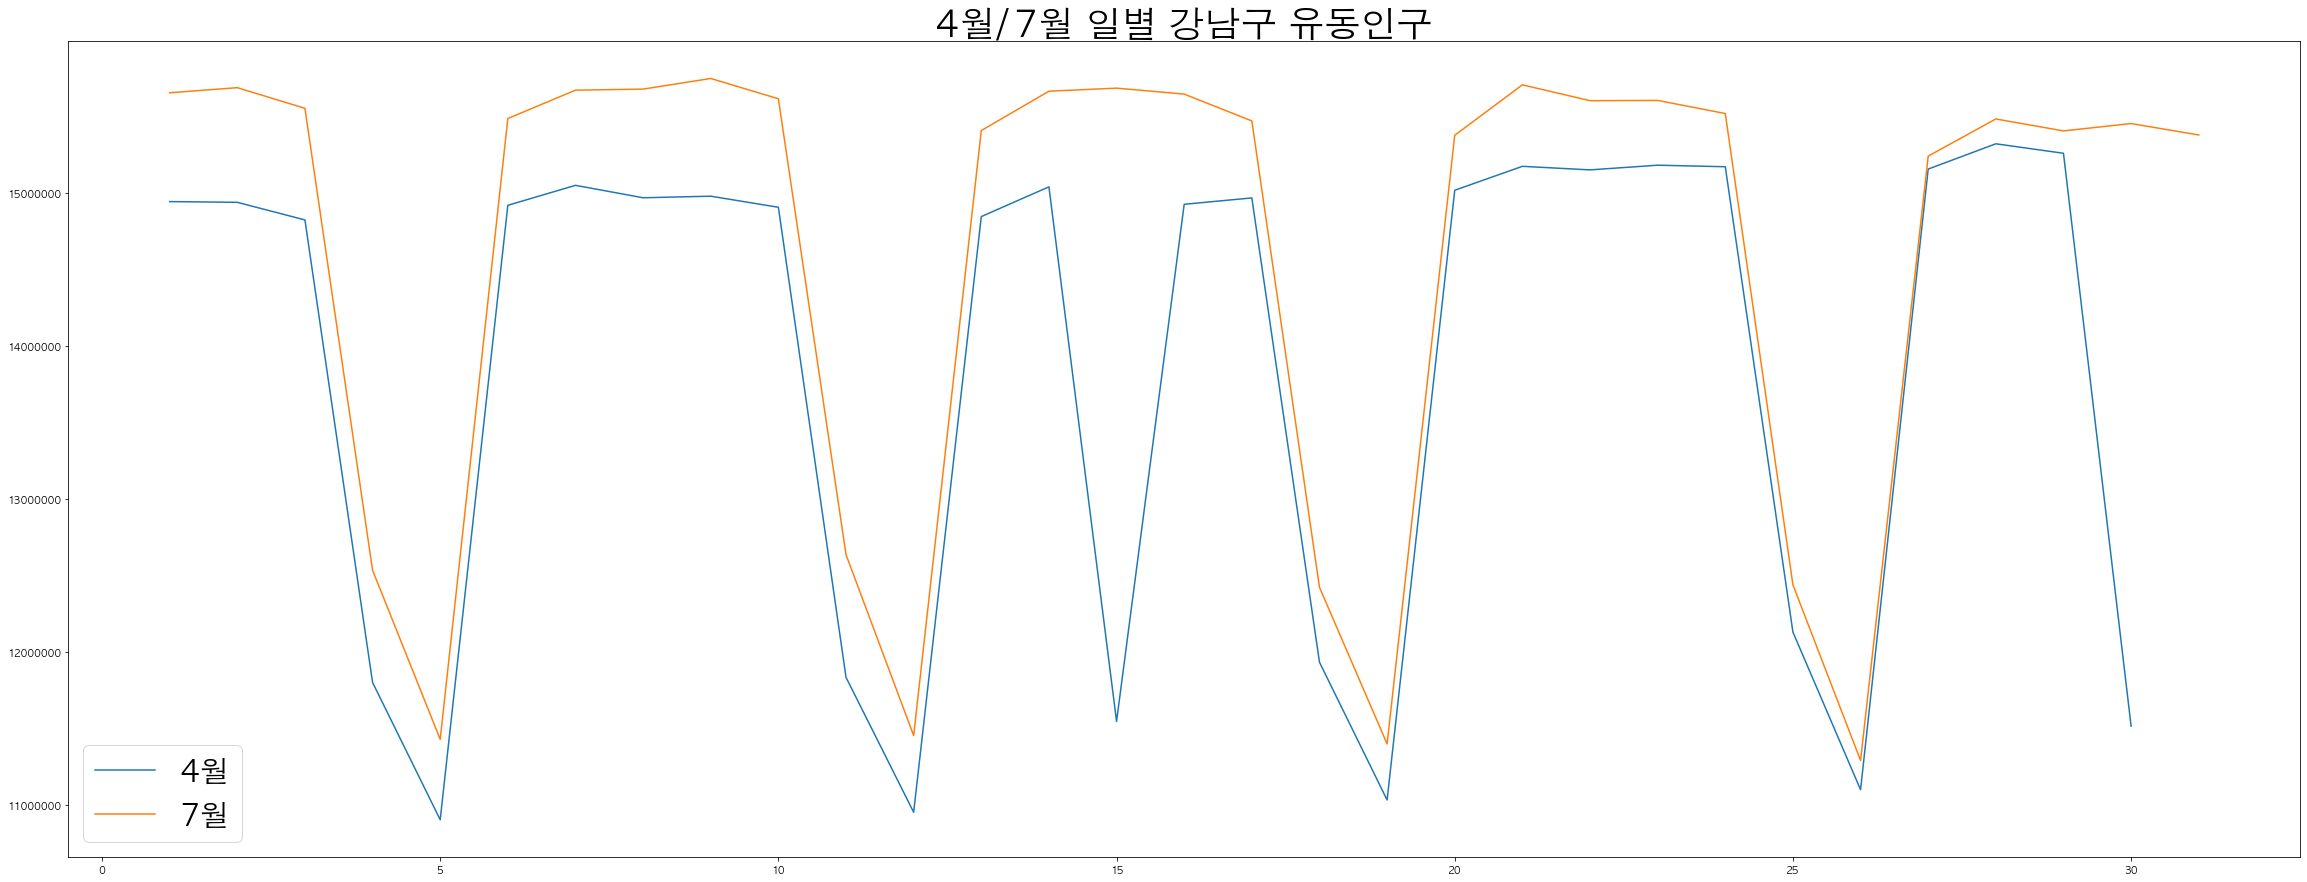

In [12]:
plt.figure(figsize=(40,15))
p1, = plt.plot(gangnam04_day['일'], gangnam04_day['유동인구수'])
p2, = plt.plot(gangnam07_day['일'], gangnam07_day['유동인구수'])
plt.legend((p1, p2), ('4월', '7월'), fontsize=30)
plt.rcParams['font.size'] = 30
plt.ticklabel_format(style = 'plain')
plt.title('4월/7월 일별 강남구 유동인구')
plt.show()